<center>
    <img src="https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/adsp_logo.png?raw=1">
</center>

### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta


# Prediction
## Lecture Video:

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/1oJIWwnfilk" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

In [ ]:
# Configurations for Google Colab
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !git clone https://github.com/GuitarsAI/ADSP_Tutorials.git
    path="./ADSP_Tutorials"
else:
    print('Not running on CoLab')
    path="."

Running on CoLab
Cloning into 'ADSP_Tutorials'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 300 (delta 0), reused 0 (delta 0), pack-reused 297 (from 1)
Receiving objects: 100% (300/300), 105.19 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Updating files: 100% (71/71), done.


In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/fKrlRUFPrDg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

Prediction can be seen as a special case of a Wiener filter, where the noise of our signal corresponds to a shift of our signal into the past. Our goal is to make a “good” estimation of the present sample of our signal, based on **past signal samples**. “Good” here means, again in a mean squared error sense.

Basically we can now take our Wiener Filter formulation, and specialize it to this case. Looking at our matrix formulation, we get

$$\large
 \left [ \matrix{ 0 & x(0) \\ x(0) & x(1) \\ x(1) & x(2) \\ \vdots & \vdots }  \right ] \cdot \left [ \matrix{h(2) \\ h(1) }  \right ]  = \left [ \matrix{x(1) \\ x(2) \\ x(3)\\ \vdots }  \right ]    
$$

<center>
or
</center>

$$\large
\boldsymbol A \cdot \boldsymbol h^T = \boldsymbol x$$

This means, the input to our filter is always starting at one sample in the past, going down further into the past.  Its goal is to estimate or “predict” the next coming sample. Basically this means that instead of additive white noise, our **distortion** is now a **delay** operator (fortunately, this is a linear operator).

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/LllwthmhLQ4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

Now we can again use our approach with pseudo-inverses to obtain our mean-squared error solution,

$$\large
\boldsymbol h = (\boldsymbol A ^T \cdot \boldsymbol A) ^{-1} \boldsymbol A^T \cdot \boldsymbol x
$$

with the matrix $\boldsymbol A$ now defined as our above matrix. This now also leads to a statistical description, with $\boldsymbol A ^ {T} \cdot \boldsymbol A$ converging to

$$\large
\boldsymbol A^T \cdot \boldsymbol A \rightarrow \boldsymbol R_{xx} =  \left [ \matrix{ r_{xx(0)} & r_{xx(1)} & r_{xx(2)}  & \cdots
\\ r_{xx(1)} & r_{xx(0)} & r_{xx(1)}  & \cdots
\\ \vdots & \vdots & \vdots }  \right ]
$$

This is plausible, because now y(n) is just the delayed signal, and the auto-correlation function of the delayed signal is identical to the auto-correlation function of the original function.



In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/A7qWqH4E2HI" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

Next we need the cross-correlation $\boldsymbol A^T \cdot \boldsymbol x$. Since we now just have this 1 sample in the future as our target vector, this converges to the auto-correlation vector, starting at **lag 1**,

$$\large
\boldsymbol A^T \cdot \boldsymbol x \rightarrow \boldsymbol r_{xx} =  \left [ \matrix{ r_{xx(1)} \\ r_{xx(2)} \\ \vdots}  \right ]
$$




So together we get the solution for our prediction filter as

$$\large
\boldsymbol h = (\boldsymbol R_{xx}) ^{-1} \boldsymbol r_{xx}
$$

A system which produces the **prediction error** (for instance of part of an encoder) as an output is the following,

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture14-1.JPG?raw=1' width='800'>
</center>

Here, $x(n)$ is the signal to be predicted, $H(z)$ is our prediction filter, whose **coefficents** are obtained with our **Wiener approach** in the last lecture slides,

$\boldsymbol h=\boldsymbol {(R_{xx})}^{-1} \boldsymbol r_{xx}$, where $H(z)$ is simply its z-transform.

It works on only past samples (that's why we have the delay element by one sample, $z^{-1}$, before it), $\hat x(n)$ is our **predicted** signal, and $e(n)=x(n)-\hat x(n)$ is our **prediction error** signal. Hence, our system which produces the prediction error has the z-domain transfer function of

$$\large
H_{perr}(z)=1-z^{-1} \cdot H(z)
$$

This can be an **encoder**. Observe that we can **reconstruct** the original signal $x(n)$ in a **decoder** from the prediction error $e(n)$, with the following system,

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture14-2.JPG?raw=1' width='800'>
</center>
    
Remember that encoder computed $e(n)=x(n)-\hat x(n)$.

The feedback loop in this system is causal because it only uses **past**, already **reconstructed samples**!

Observe that this decoders transfer function is

$$\large
 {H_{rec}(z)} = \frac{1}  {1-z^{-1} \cdot H(z)}=\frac{1}  {H_{perr}(z)}
$$

which is exactly the inverse of the encoder, which was to be expected.

## Python Example

**Goal:** Construct a prediction filter for Iron Maiden - Aces High speech signal of **order L=10**, which minimizes the mean-squared prediction error.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/AQ198XfsHS0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

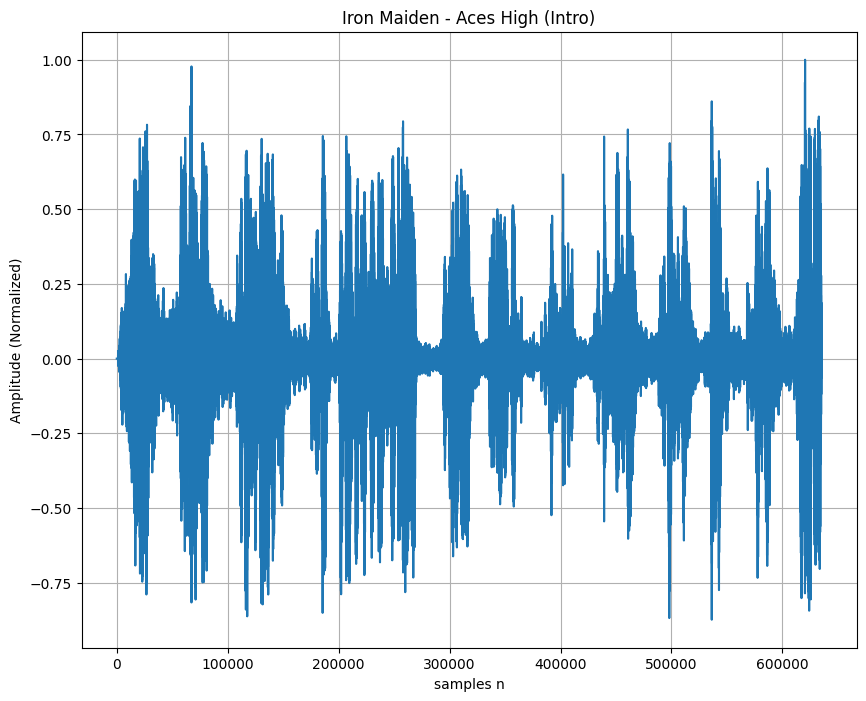

In [ ]:
# Imports
import librosa as lbr
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# Import Speech
x , sr = lbr.load(path+'/audio/Iron Maiden - Aces High.mp3', offset=0, duration=28.8)
# Normalize Audio
x/=np.abs(x).max()
# Plot Audio
plt.figure(figsize=(10,8))
plt.plot(x)
plt.title('Iron Maiden - Aces High (Intro)')
plt.xlabel('samples n')
plt.ylabel('Amplitude (Normalized)');
plt.grid()
# Listen
display(ipd.Audio(x, rate = sr ))

In [ ]:
#make x a matrix of ﬂoat type and transpose
#it into a column
x=np.matrix(x,dtype=float).T
#Construct our Matrix A from x:
A=np.matrix(np.zeros((100000,10)));
for m in range(0,100000):
    A[m, :]=np.flipud(x[m+np.arange(10)]).T

In [ ]:
#Construct our desired target signal d,
#one sample into the future, we
#start with the first 10 samples already in the
#prediction filter, then the 11th sample is
#the frst to be predicted:
d = x[np.arange(10,100010)]
#Compute the prediction flter:
h=np.linalg.inv(A.T*A) * A.T * d;
print(h)

[[ 2.15026312]
 [-2.05692605]
 [ 1.25452254]
 [-0.84670551]
 [ 0.87218545]
 [-0.66408224]
 [ 0.46018733]
 [-0.43052421]
 [ 0.29395614]
 [-0.08626276]]


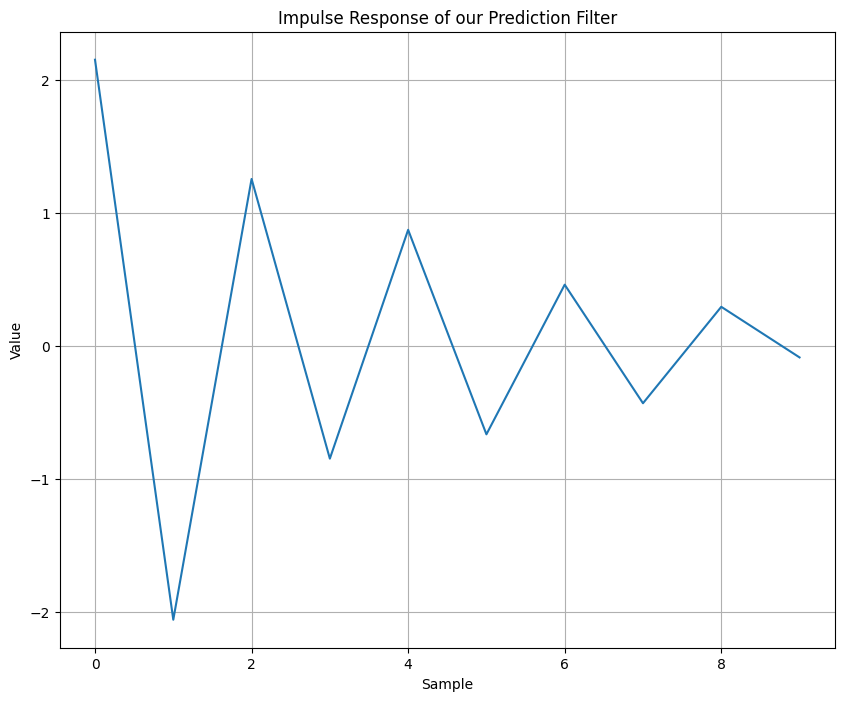

In [ ]:
plt.figure(figsize=(10,8))
plt.plot((h))
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Impulse Response of our Prediction Filter')
plt.grid()

Then our prediction filter, with the delay in the encoder becomes (to compare it with the original signal):   

In [ ]:
hpred = np.vstack([0, (h)])
print(hpred)

[[ 0.        ]
 [ 2.15026312]
 [-2.05692605]
 [ 1.25452254]
 [-0.84670551]
 [ 0.87218545]
 [-0.66408224]
 [ 0.46018733]
 [-0.43052421]
 [ 0.29395614]
 [-0.08626276]]


The predicted values are now obtained by applying these coefficients as an FIR filter:        

In [ ]:
import scipy.signal as sp
xpred = sp.lfilter(np.array(hpred.T)[0],1,np.array(x.T)[0])

Now we can plot the predicted values on top of the actual original signal values, to see how accurate our prediction is:

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
%matplotlib inline

#Plotting with plotly (allows hovering and zooming and such):
print(np.array(x)[:,0].shape, xpred.shape)
#Activate for zoom capability:
"""
d = {'Original': np.array(x)[:,0],'Predicted':xpred }
df = pd.DataFrame(data=d)
fig=px.line(df,title='Our Speech Wave Form')
fig.show()
"""

(635040,) (635040,)


"\nd = {'Original': np.array(x)[:,0],'Predicted':xpred }\ndf = pd.DataFrame(data=d)\nfig=px.line(df,title='Our Speech Wave Form')\nfig.show()\n"

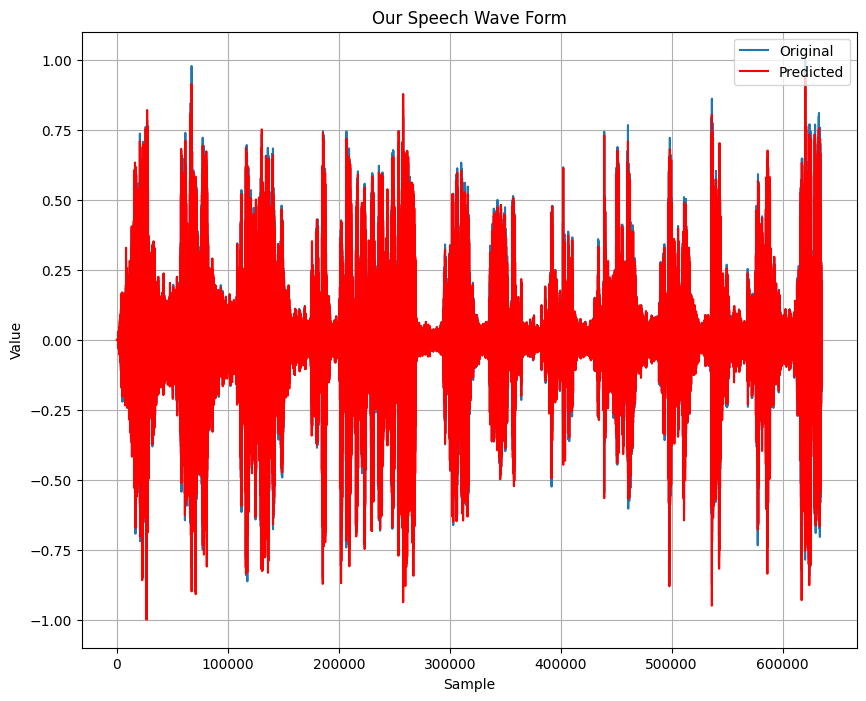

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x);
plt.plot(xpred,'red')
plt.legend(('Original','Predicted'), loc='upper right')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Our Speech Wave Form')
plt.grid()

Our corresponding **prediction error** filter (which is in the **encoder**) is:

$$\large
H_{perr}(z)=1-z^{-1}\cdot H(z)$$

in Python:

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/IE_ZCB1gGSQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

In [ ]:
hperr = np.vstack([1, -(h)])
print(hperr)

[[ 1.        ]
 [-2.15026312]
 [ 2.05692605]
 [-1.25452254]
 [ 0.84670551]
 [-0.87218545]
 [ 0.66408224]
 [-0.46018733]
 [ 0.43052421]
 [-0.29395614]
 [ 0.08626276]]


The prediction error e(n) is obtained using our prediction error filter:

In [ ]:
e = sp.lfilter(np.array(hperr.T)[0],1,np.array(x.T)[0]);
#make a matrix type out of it (row matrix):
e=np.matrix(e)

Error power per sample:  

In [ ]:
e*e.T/max(np.shape(e))

matrix([[0.00039879]])

Compare that with the mean squared signal power per sample:

In [ ]:
x.T*x/max(np.shape(x))

matrix([[0.01182721]])

Which is more than 10 times as big as the prediction error! Which shows that it works!

Listen to the error signal:

In [ ]:
display(ipd.Audio(e[0], rate = sr ))

Take a look at the signal and it's prediction error:

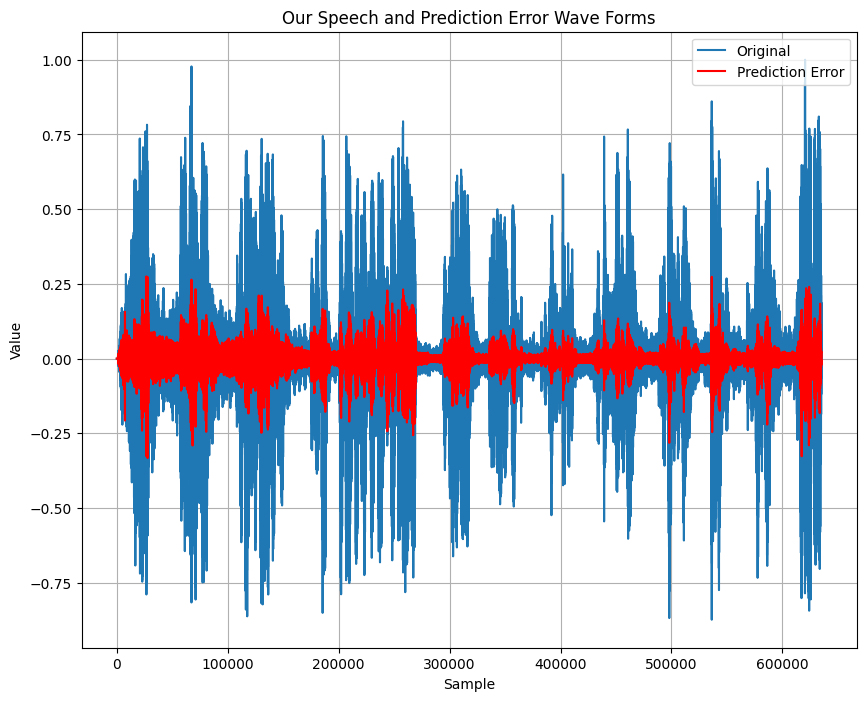

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x)
plt.plot(e.T,'r')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Our Speech and Prediction Error Wave Forms')
plt.legend(('Original', 'Prediction Error'), loc='upper right')
plt.grid()

The **decoder** uses the reverse filter structure $ H_{rec}=\frac{1 }{1-z^{-1} \cdot H(z)}=\frac{1} {H_{perr}(z)}$,
hence we use the following filter command to generate the reconstructed signal:

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/BAz8Kvu4VYA" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

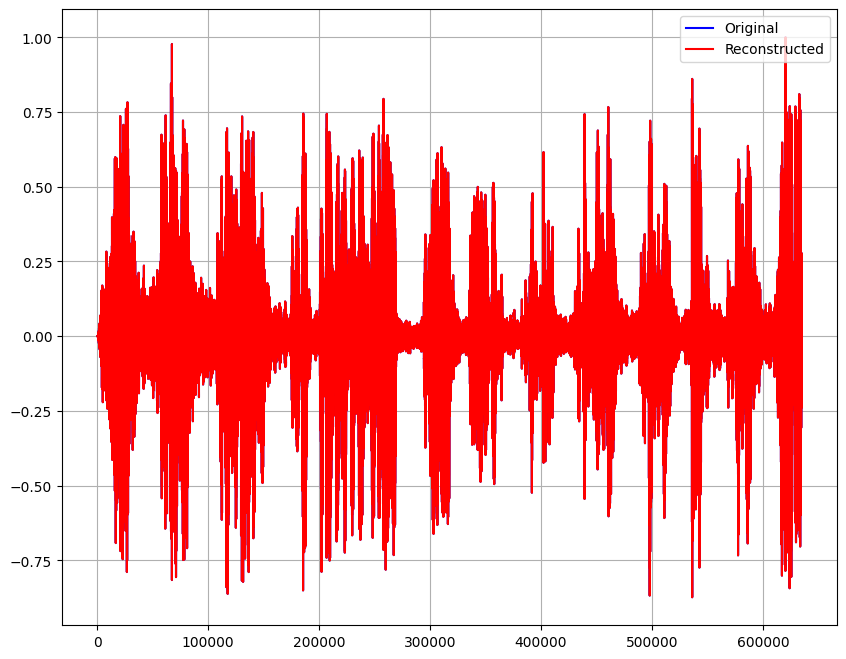

In [ ]:
xrec = sp.lfilter([1],np.array(hperr.T)[0], np.array(e)[0]);
#plot original for comparison:
plt.figure(figsize=(10,8))
plt.plot(x,'b')
#Plot decoded reconstructed on top in red:
plt.plot(xrec,'r')
#plt.xlim([10000, 10100]) #zooming in
plt.legend(('Original', 'Reconstructed'), loc='upper right')
plt.grid()

In [ ]:
display(ipd.Audio(xrec, rate = sr ))

**Observe:** The decoded, reconstructed looks and sound **identical** to the original, as expected. This means we can indeed use it in an encoder-decoder setting.

In [ ]:
print(x.shape, xrec.shape)

(635040, 1) (635040,)


x.shape= (635040, 1) xrec.shape= (635040,)
xflat.shape= (635040,)
Trying to find when Array 2 starts in Array 1.
	The first array Array 1 contains 635040 samples, at a rate of 22050 Hz.
	The second array Array 2 contains 635040 samples, at a rate of 22050 Hz.

Getting the envelope from Array 1...
	Getting the Hilbert transform... 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% - Done.
	Applying a low-pass filter for frequencies below 50 Hz.
	Envelope calculated in: 0:00:00.059704
Getting the envelope from Array 2...
	Getting the Hilbert transform... 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% - Done.
	Applying a low-pass filter for frequencies below 50 Hz.
	Envelope calculated in: 0:00:00.057272
Envelopes calculated.

Resampling Array 1...
	Not performing the resampling as the resampling frequency is the same as the original frequency (22050 Hz).
Resampling Array 2...
	Not performing the resampling as the resampling frequency is the same as the original frequency (22050 Hz).
Resampling done.

Co

Text(0.5, 1.0, 'Reconstruction Error Magnitude')

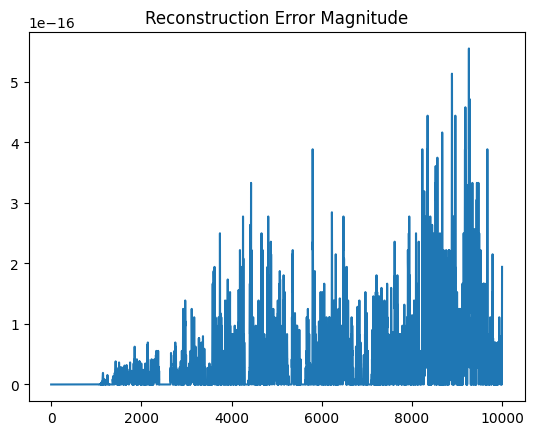

In [ ]:
#Veryfy perfect reconstruction:
!pip install find-delay
from find_delay import find_delay
print("x.shape=",x.shape, "xrec.shape=",xrec.shape)
xflat=np.array(x)[:,0]
print("xflat.shape=",xflat.shape)
# Pass the sampling rate 'sr' to the find_delay function
delay=find_delay(xflat,xrec, freq_array_1=sr, freq_array_2=sr)
print("delay=",delay)

xdiff=xflat[0:10000-delay]-xrec[delay:10000]
#print(xdiff.shape)
#print(xdiff)
plt.plot(np.abs(xdiff))
plt.title("Reconstruction Error Magnitude")

## Neural Network Implementation

Again we can also use the numerical optimization of Pytorch instead of our closed form solution from Wiener-Hopf, and a conv1d layer.

We also use the **mean squared error** as minimization criteriun or “loss function”. In this case this does not diﬀer from the target of the closed form formulation, and hence we obtain almost the same solution. Here, the desired target signal Y is the audio input signal X, but 1 sample in the future,

`X=audio[:-L]) #remove last samples (conv makes it longer again)`

```Y=audio[1:]) #remove frst sample, for the signal to predict, 1
sample in the future
```  

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/kmArYc5NxJU" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

In [ ]:
# -*- coding: utf-8 -*-
__author__ = 'Gerald Schuller'
__copyright__ = 'G.S.'

"""
Simple program to use a convolutional neural network to obtain a prective coder,
using explicit inputs to layers, to enable skip layers.
According to: https://keras.io/getting-started/functional-api-guide/
With Pytorch
For instance according to WCLMS or prediction Boosting


Gerald Schuller, November 2018.

--- Modified by Renato Profeta to use librosa, March 2020
"""
;

In [ ]:
# Imports
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.io.wavfile as wav
import librosa as lbr

if sys.version_info[0] < 3:
   # for Python 2
   import cPickle as pickle
else:
   # for Python 3
   import pickle

In [ ]:
L=12 #filter length
dilation=1 #Dilation: upsampling the filter impulse response, new filter length: (L-1)*dilation+1

def format_vector2pytorch(vector):
    #Function to convert a vector, like a mono audio signal, into a 3-d Tensor X that Keras expects
    #Tensor X with shape (batch, signal):
    #https://discuss.pytorch.org/t/confused-about-tensor-dimensions-and-batches/4761
    X = np.expand_dims(vector, axis=0)  #add batch dimension (here only 1 batch)
    X = np.expand_dims(X, axis=0)
    X=torch.from_numpy(X)
    X=X.type(torch.Tensor)
    return X


class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # Define the model.
        self.layer1=nn.Sequential(nn.Conv1d(in_channels=1, out_channels=1, kernel_size=L, stride=1,
                                            dilation=dilation, padding=dilation*(L-1), bias=False))
        #https://pytorch.org/docs/stable/nn.html#conv1d
        # Generate a convolutional neural network model, 1 layer, no bias, linear activation function
        # returns: Trainable object
        #concatenate data:
        #https://discuss.pytorch.org/t/concatenate-layer-output-with-additional-input-data/20462
        #input of layer: x, output of layer: out
    def forward(self, x):
        out = self.layer1(x)
        return out

In [ ]:
#Example to find prediction coefficients to minimize the mean absolute error using Python Keras
#and 1 Convolutional layer as a predictor.

#Input mono audio signal X:
#samplerate, audio = wav.read("mspeech.wav")
audio, samplerate = lbr.load(path+"/audio/Iron Maiden - Aces High.mp3", duration=28.8)
audio/=np.abs(audio).max()

#audiosh=audio[:100000] #shorten the signal for faster optimization,
audiosh=audio
plt.figure(figsize=(10,8))
plt.plot(audiosh)
plt.title("The Audio Signal to Predict")
plt.grid()

X=format_vector2pytorch(audiosh[:-((L-1)*dilation+1)])      #remove last samples
Y=format_vector2pytorch(audiosh[1:]) #remove first sample, for the signal to predict, 1 sample in the future


print("Input X.shape=", X.shape )
print("Target Y.shape=", Y.shape)
display(ipd.Audio(audio, rate = samplerate ))

In [ ]:
model = ConvNet()#.to('cpu')
loss_fn = nn.MSELoss(reduction='sum')
#learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters())#, lr=learning_rate)

In [ ]:
for epoch in range(1000): #repeat running this cell if error is not low enough.
    Ypred=model(X)
    loss=loss_fn(Ypred, Y)
    if epoch%100==0:
        print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.save({'epoch': epoch,'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()}, "linpredweights.torch")

In [ ]:
#Processing full length signal:
X=format_vector2pytorch(audio[:-((L-1)*dilation+1)])  #remove last samples
Y=format_vector2pytorch(audio[1:]) #remove first sample
predictions=model(X) # Make Predictions based on the obtained weights, on short audio
#mean squared predicton error:
err= sum((predictions[0,0,:]-Y[0,0,:])**2)/max(Y.shape)
print("mean squared prediction error=", err)
#mean signal power:
sigpow=sum(X[0,0,:]**2)/max(X.shape)
print("mean signal power=", sigpow)
print("Signal to Error Power Ratio:", sigpow/err)

ww = model.state_dict()   #read obtained weights
print("ww=", ww)
#weight format for Conv1d:
#[0: filter weights, 1: bias for first layer]
#weight: filters of shape: out_channels× in_channelsgroups× kW
weights=ww['layer1.0.weight'][0,0,:]
print("weights= ", weights)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(np.array(Y[0,0,:]))
plt.plot(predictions.detach().numpy()[0,0,:])
plt.legend(('Original','Predicted'))
plt.title('The Original and Predicted Signal')
plt.xlabel('Sample')
plt.grid()

plt.figure(figsize=(10,8))
plt.plot(np.array(Y[0,0,:]))
plt.plot(predictions.detach().numpy()[0,0,:]-np.array(Y[0,0,:]))
plt.legend(('Original','Prediction Error'))
plt.title('The Original and Prediction Error')
plt.xlabel('Sample')
plt.grid()

plt.figure(figsize=(10,8))
plt.plot(np.array(weights))
plt.title('The Weights')
plt.grid()

In [ ]:
# Predictions
display(ipd.Audio(predictions.detach().numpy()[0,0,:], rate = samplerate ))

## Online Adaptation

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/6HMbCoPF06o" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

The previous example calculated the prediction coefficients for the entire speech  file (or the first 100000 samples). But when we look at the signal waveform, we see that its characteristics and hence its statistics is changing, it is **not stationary**.

Hence we can expect a prediction improvement if we divide the speech signal into **small pieces** for the computation of the prediction coefficients, pieces which are small enough to show roughly **constant** statistics. In speech coding, those pieces are usually of length 20 ms, and this approach is called **Linear Predictive Coding (LPC)**. Here, the prediction coefficients are calculated usually every 20 ms, and then transmitted alongside the prediction error, from the encoder to the decoder.

This also has the advantage that it needs no “training set”, and computes the coefficients from the actual samples in the current block.

**Observe** that this also need a very fast optimization, hence the Pytorch approach with the “Adam” optimizer would not be suitable. We use our faster closed form solution instead.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/j75eozga8ZQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

### Python Example

Our speech signal is sampled at 32 kHz, hence a block of 20 ms has **640 samples**.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/DIr6SPdK4NA" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

In [ ]:
x, samplerate = lbr.load(path+"/audio/Iron Maiden - Aces High.mp3", duration=28, sr=32000)
x/=np.abs(x).max()
print('Audio Length:',np.size(x))
display(ipd.Audio(x, rate = samplerate ))

In [ ]:
L=10 #predictor length
len0 = np.max(np.size(x))
e = np.zeros(np.size(x)) #prediction error variable initialization
blocks = int(np.floor(len0/640)) #total number of blocks
state = np.zeros(L) #Memory state of prediction filter
#Building our Matrix A from blocks of length 640 samples and process:
h=np.zeros((blocks,L)) #initialize pred. coeff memory


for m in range(0,blocks):
    A = np.zeros((640-L,L)) #trick: up to 630 to avoid zeros in the matrix
    for n in range(0,640-L):
        A[n,:] = np.flipud(x[m*640+n+np.arange(L)])

    #Construct our desired target signal d, one sample into the future:
    d=x[m*640+np.arange(L,640)];
    #Compute the prediction filter:
    h[m,:] = np.dot(np.dot(np.linalg.pinv(np.dot(A.transpose(),A)), A.transpose()), d)
    hperr = np.hstack([1, -h[m,:]])
    e[m*640+np.arange(0,640)], state = sp.lfilter(hperr,[1],x[m*640+np.arange(0,640)], zi=state)

In [ ]:
#The mean-squared error now is:
print ("The average squared error is:", np.dot(e.transpose(),e)/np.max(np.size(e)))
#The average squared error is: 0.000113347859337
#We can see that this is only about 1 / 4 of the previous pred. Error!
print ("Compare that with the mean squared signal power:", np.dot(x.transpose(),x)/np.max(np.size(x)))
#0.00697569381701
print ("The Signal to Error ratio is:", np.dot(x.transpose(),x)/np.dot(e.transpose(),e))
#61.5423516403
#So our LPC pred err energy is more than a factor of 61 smaller than the
#signal energy!
#Listen to the prediction error:
display(ipd.Audio(e, rate = samplerate ))

#Take a look at the signal and it's prediction error:
plt.figure(figsize=(10,8))
plt.plot(x)
#plt.hold(True)
plt.plot(e,'r')
plt.xlabel('Sample')
plt.ylabel('Normalized Value')
plt.legend(('Original','Prediction Error'))
plt.title('LPC Coding')
plt.grid()

 Here it can be seen that the prediction error is even smaller than before.

The **decoder** works the way as shown in the previous example, and the reconstructed speech can be heard in the end.

**LPC** type **coders** are for instance speech coders, where usually 12 coefficients are used for the prediction, and **transmitted as side information** every 20 ms. The prediction error is parameterized and transmitted as parameters with a very low bit rate. This kind of system is used for instance in most digital **cell phones** systems.

In [ ]:
#Decoder:
xrek=np.zeros(x.shape) #initialize reconstructed signal memory
state = np.zeros(L) #Initialize Memory state of prediction filter
for m in range(0,blocks):
    hperr = np.hstack([1, -h[m,:]])
    #predictive reconstruction filter: hperr from numerator to denominator:
    xrek[m*640+np.arange(0,640)] , state = sp.lfilter([1], hperr,e[m*640+np.arange(0,640)], zi=state)

#Listen to the reconstructed signal:
display(ipd.Audio(xrek, rate = samplerate ))

## Least Mean Squares (LMS) Algorithm

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/CI-Q24AumME" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

Unlike the LPC algorithm above, which computes prediction coefficients for a block of samples and transmits these coefficients alongside the prediction error to the receiver, the LMS algorithm updates the prediction coefficients after each sample, but based only on **past** samples.

Hence here we need the assumption that the signal statistics does not change much from the past to the present. Since it is based on the past samples, which are also available as decoded samples at the decoder, we do not need to transmit the coefficients to the decoder. Instead, the decoder carries out the same computations in **synchrony with the encoder**.

Instead of a matrix formulation, we use an iterative algorithm to come up with a solution for the prediction coefficients $h$ the vector which contains the time-reversed impulse response.

To show the dependency on the time $n$, we now call the vector of prediction coefficients $h(n)$, with

$$\large
h(n)=[h_0(n),\ldots ,h_{L-1}(n)]$$

Again we would like to **minimize** the **mean quadratic prediction error** (with the prediction error $e(n) = x(n)-\hat x(n)$),

$$\large
E \left [ (x(n)-\hat x(n))^2 \right ]= E \left[(x(n) - \sum_ {k=0}^ {L-1} h_k(n)x(n-1-k))^2 \right]
$$

Instead of using the closed form solution, which lead to the Wiener-Hopf Solution, we now take an **iterative** approach to approach the minimum of this optimization function.

We use the algorithm of **Steepest Descent** (also called **Gradient Descent**), see also http://en.wikipedia.org/wiki/Gradient_descent, to iterate towards the minimum,

$$\large
\boldsymbol h(n+1)= \boldsymbol h(n) - \alpha \cdot \nabla f(\boldsymbol h(n))
$$

with **optimization function** as our squared prediction error,<br>

$$\large
f(\boldsymbol h(n))=(x(n) - \sum_ {k=0} ^ {L-1} h_k(n)x(n-1-k))^2
$$

**Observe** that we omitted the Expectation operator “E” for simplicity; we expect that after several update steps there will be inherently some averaging. This is also called **“Stochastic Gradient Descent”** We have the Gradient as the row vector<br>

$$\large
\nabla f(n)=\left[ \frac{\partial f(\boldsymbol h(n))}  {\partial h_0(n)},...,\frac{\partial f(\boldsymbol h(n))} {\partial h_{L-1}(n)} \right]
$$

and we get the individual derivatives as

$$\large
\frac{\partial f(\boldsymbol h(n))} {\partial h_k(n)}= 2 \cdot e(n) \cdot (-x(n-1-k))
$$

So together we obtain the **LMS algorithm** or **update rule** as


$$\large
h_k(n+1)= h_k(n)+ \alpha \cdot e(n) \cdot x(n-1-k)  
$$

for $k=0, \ldots L-1$, where $\alpha$ is a tuning parameter (the factor 2 is incorporated into $\alpha$), with which we can trade off **convergence speed and convergence accuracy**. A derivation or computation of the $\alpha$ value can be found in the lecture **slide set 15** of our lecture “**Multirate Signal Processing**”.


In vector form, this LMS update rule is

$$\large
\boldsymbol h(n+1)= \boldsymbol h(n) + \alpha \cdot e(n) \cdot \boldsymbol x(n)$$
where $\boldsymbol x(n)= \left[x(n-1),x(n-2),...,x(n-L)\right]$.

**Observe** that we need no matrices or matrix inverses in this case, just this simple update rule, and it still works! It still converges to the “correct” coefficients!
For the prediction coefficients $h$ we have something like a “**sliding window**” of the past L samples $x(n)$ of our signal.

For $\alpha$ there are different “recipes”, for instance the so-called normalized LMS (NLMS) uses the inverse signal power as $\alpha$. If the signal power is one, then $\alpha$ can be one. But in general it is subject to “hand tuning”, trial and error.

### LMS Python Example

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/2ZgnWwKMlT4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

In [ ]:
x, samplerate = lbr.load(path+"/audio/Iron Maiden - Aces High.mp3", duration=28, sr=32000)
print('Audio Length:',np.size(x))
display(ipd.Audio(x, rate = samplerate ))

In [ ]:
e = np.zeros(np.size(x))
h = np.zeros(10)

In [ ]:
#have same 0 starting values as in decoder:
x[0:10]=0.0
for n in range(10, len(x)):
    #prediction error and filter, using the vector of the time reversed IR:
    e[n] = x[n] - np.dot(np.flipud(x[n-10+np.arange(0,10)]),(h))
    #LMS update rule, according to the definition above:
    h = h + 1.0* e[n]*np.flipud(x[n-10+np.arange(0,10)]) #larger alpha here means faster adaption but larger error

In [ ]:
print( "Mean squared prediction error:", np.dot(e, e) /np.max(np.size(e)))

In [ ]:
display(ipd.Audio(e, rate = samplerate ))

The comparison plot of the original to the prediction error:

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x)
plt.plot(e,'r')
plt.xlabel('Sample')
plt.ylabel('Normalized Sample')
plt.title('Least Mean Squares (LMS) Online Adaptation')
plt.legend(('Original','Prediction Error'))
plt.grid()


**Observe:** its prediction error is bigger than in the **LPC** case, but we also don't need to transmit the prediction coefficients as side information.<br>

The comparison plot of the original to the prediction error can be seen in above python example

For the **decoder** we get the reconstruction:

In [ ]:
# Decoder
h = np.zeros(10);
xrek = np.zeros(np.size(x))


for n in range(10, len(x)):
    if np.any(np.isnan(h)):
        print('n',n)
        print('Decoder h:',h)
        break
    xrek[n] = e[n] + np.dot(np.flipud(xrek[n-10+np.arange(10)]), h)
    #LMS update:
    h = h + 1.0 * e[n]*np.flipud(xrek[n-10+np.arange(10)]);


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(xrek)
plt.grid()

**Sensitivity** of the decoder for transmission **errors**: In the code for the decoder in the LMS update for the predictor h, correctly we need xrek instead of x (since x is not available in the decoder). The slightest computation errors, for instance **rounding errors**, are sufficient to make the decoder diverge and stop working after a few syllables of the speech.  

We see that the computed **prediction coefficients differ** in the last digits between encoder and decoder, which is enough for **increasing divergence** between encoder and decoder, until the decoded signal “explodes” (becomes huge from instability).

This shows that **LMS is very sensitive to transmission errors**.

To avoid at least the computation errors, we need to include quantization in the process.

## Predictive Encoder with Quantizer

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/9O0G7WlUYvI" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture14-3.jpg?raw=1' width='800'>
</center>
   
Here we can see a predictive encoder with **quantization** of the prediction error. In order to make sure the encoder predictor works on the quantized values, like in the decoder, it uses a **decoder in the encoder** structure, which produces the quantized reconstructed value $Q(x(n))$ (the function Q() here include both, quantizer and de-quantizer).

The decoder stays the same, except for the  de-quantization of the prediction error in the beginning:


<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture14-4.JPG?raw=1' width='800'>
</center>


Observe: The reconstructed signal x(n) is the same as for the encoder, plus the quantization error from the quantizer:

$$\large
Q( x(n) )= e(n) + \hat{ x}( n) $$

### LMS with Quantizer Python Example

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/pWqIUaV_ixU" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

In [ ]:
x, samplerate = lbr.load(path+"/audio/Iron Maiden - Aces High.mp3", duration=28, sr=32000)
print('Audio Length:',np.size(x))
display(ipd.Audio(x, rate = samplerate ))

In [ ]:
e = np.zeros(np.size(x))
xrek=np.zeros(np.size(x));
quantindex=np.zeros(np.size(x));
P=0;
L=10
h = np.zeros(L)
#have same 0 starting values as in decoder:
x[0:L]=0.0
quantstep=0.01;
for n in range(L, len(x)):
    if n> 41405 and n< 41408:
        print('n:',n)
        print ("encoder h: ", h, "\ne=", e)
    #prediction error and filter, using the vector of the time reversed IR:
    #predicted value from past reconstructed values:
    P=np.dot(np.flipud(xrek[n-L+np.arange(L)]), h)
    #quantize and de-quantize e to step-size 0.05 (mid tread):
    quantindex[n]=np.round((x[n]-P)/quantstep) #to be transmitted
    quantindex[n]=np.clip(quantindex[n], -127, 127) #clipping to the range of int8
    e[n]=quantindex[n]*quantstep;
    #Decoder in encoder:
    #new reconstructed value:
    xrek[n]=e[n]+P;
    #LMS update rule:
    h = h + 1.0* e[n]*np.flipud(xrek[n-L+np.arange(L)])
print("max(abs(quantindex))=",max(abs(quantindex)))
print( "Mean squared prediction error:", np.dot(e, e) /np.max(np.size(e)))

In [ ]:
print ("Compare that with the mean squared signal power:", np.dot(x.transpose(),x)/np.max(np.size(x)))
print ("The Signal to Error ratio is:", np.dot(x.transpose(),x)/np.dot(e.transpose(),e))
display(ipd.Audio(e, rate = samplerate ))

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x)
plt.plot(e,'r')
plt.xlabel('Sample')
plt.ylabel('Normalized Sample')
plt.title('Least Mean Squares (LMS) Online Adaptation')
plt.legend(('Original','Prediction Error'))

In [ ]:
# Decoder
h = np.zeros(L);
xrek = np.zeros(np.size(x));
quantstep=0.01
e=quantindex*quantstep; #de-quantization
for n in range(L, len(x)):
    if n> 41405 and n< 41408:
        print('n:',n)
        print ("encoder h: ", h, "\ne=", e)
    P=np.dot(np.flipud(xrek[n-L+np.arange(L)]), h)
    xrek[n] = e[n] + P
    #LMS update:
    h = h + 1.0 * e[n]*np.flipud(xrek[n-L+np.arange(L)]);

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(xrek)
plt.xlabel('Sample')
plt.ylabel('Normalized Sample')
plt.title('The Reconstructed Signal')
plt.grid()

In [ ]:
display(ipd.Audio(np.clip(xrek, -1.0, 1.0), rate = samplerate ))

**Observe:** Because of the quantization, the prediction error now clearly increased.

**Observe:** The signal is now **fully decoded**, even with quantization, although with a little noise, which was to be expected. But we can avoid the noise by reducing the quantization step size.

Observe that this structure for the **decoder in the encoder also applies** to the **other prediction methods**.

## Application of LPC and LMS linear prediction for denoising speech and audio

- By viewing speech and audio signals as predictable signals, and noise as unpredictable, we can use the predictor output as a denoiser.
- Look at the Jupyter Notebbok at: https://colab.research.google.com/github/TUIlmenauAMS/ADSP_Tutorials/blob/master/predictiveDenoiser.ipynb
- A corresponding browser app for live audio is: https://github.com/TUIlmenauAMS/ADSP_Tutorials/blob/master/predictiveDenoiser.html
- To run it, first download it, and then in the terminal run:
  - python3 -m http.server 8000
  - Then in your browser open:
  - http://localhost:8000
  - and select "predictiveDenoiser.html" to open in the dialog